In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
# multi-class classification with Keras using sk-learn
from keras.wrappers.scikit_learn import KerasClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

import tensorflow as tf

In [6]:
dataset = pd.read_csv('kddcup.data_10_percent_corrected(KDD99).csv')
dataset.shape

(494021, 42)

In [7]:
dataset.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
dataset.target.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [9]:
dataset.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_hot_login                     int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [10]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Data Encoding
for column in dataset:
    unique_vals = np.unique(dataset[column])
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values  for feature {} : {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values  for feature {} : {}'.format(column, nr_values))

The number of values  for feature duration : 2495
The number of values  for feature protocol_type : 3 -- ['icmp' 'tcp' 'udp']
The number of values  for feature service : 66
The number of values  for feature flag : 11 -- ['OTH' 'REJ' 'RSTO' 'RSTOS0' 'RSTR' 'S0' 'S1' 'S2' 'S3' 'SF' 'SH']
The number of values  for feature src_bytes : 3300
The number of values  for feature dst_bytes : 10725
The number of values  for feature land : 2 -- [0 1]
The number of values  for feature wrong_fragment : 3 -- [0 1 3]
The number of values  for feature urgent : 4 -- [0 1 2 3]
The number of values  for feature hot : 22
The number of values  for feature num_failed_logins : 6 -- [0 1 2 3 4 5]
The number of values  for feature logged_in : 2 -- [0 1]
The number of values  for feature num_compromised : 23
The number of values  for feature root_shell : 2 -- [0 1]
The number of values  for feature su_attempted : 3 -- [0 1 2]
The number of values  for feature num_root : 20
The number of values  for feature num_fi

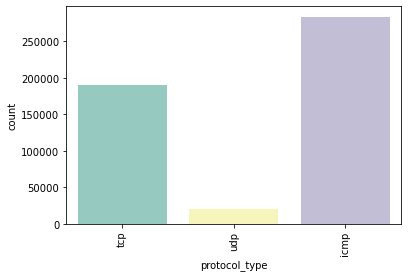

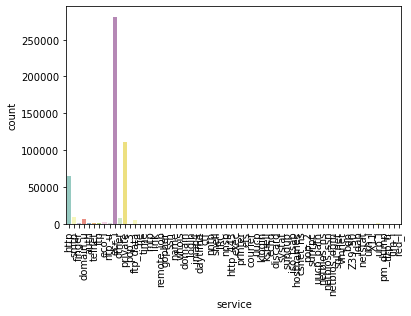

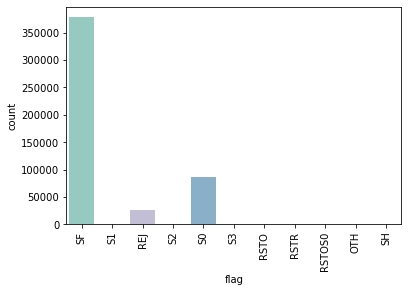

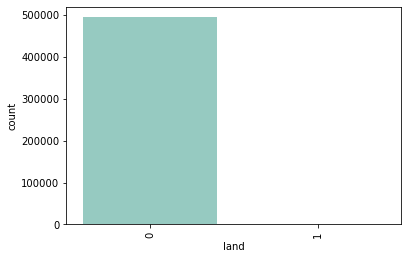

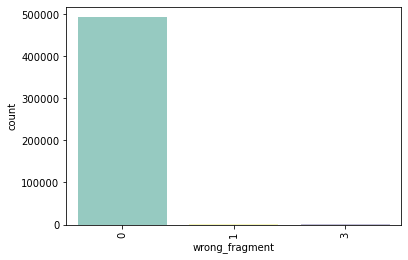

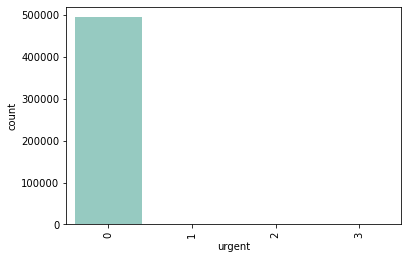

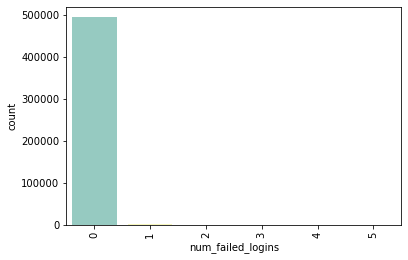

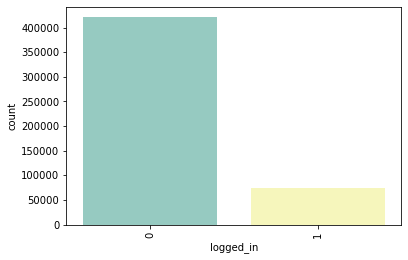

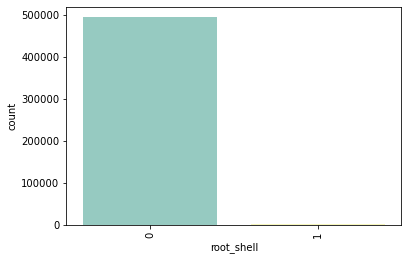

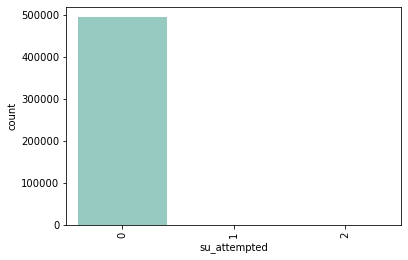

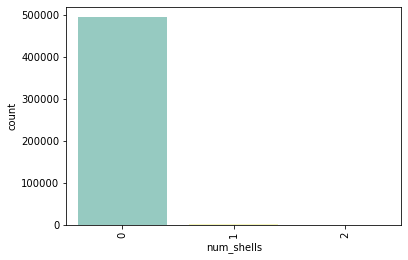

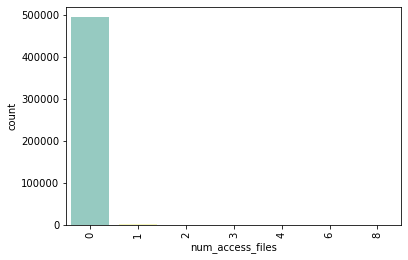

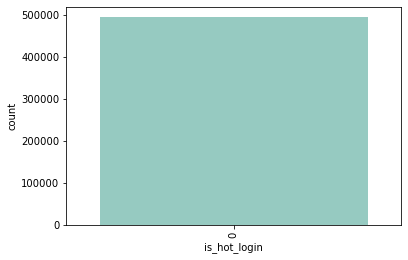

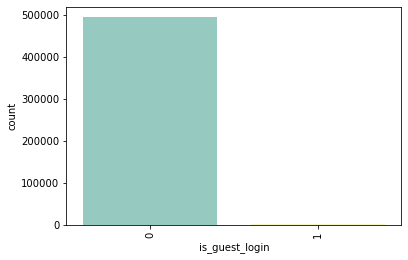

In [12]:
sel_features = ['protocol_type', 'service', 'flag', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', \
                'logged_in','root_shell', 'su_attempted','num_shells','num_access_files','is_hot_login','is_guest_login']
for f in sel_features:
    sns.countplot(x = f, data = dataset, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=90)
    plt.show()

In [13]:
# Making categorical variables into numeric representation
print(dataset.shape)

# keeping the columns we need 
raw_data = dataset[sel_features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = sel_features)

# print the shape
print(new_raw_data.shape)
new_raw_data

(494021, 42)
(494021, 14)
(494021, 115)


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,num_access_files_0,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
494017,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
494018,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
494019,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [14]:
result = pd.concat([dataset, new_raw_data], axis=1)
result

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,num_access_files_0,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [15]:
#Removing Splited Columns
data1 = result.drop(['protocol_type', 'service', 'flag', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', \
                'logged_in','root_shell', 'su_attempted','num_shells','num_access_files','is_hot_login','is_guest_login',\
                 'num_outbound_cmds'], axis=1)
data1

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_0,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1
0,0,181,5450,0,0,0,0,8,8,0.00,...,1,0,0,0,0,0,0,1,1,0
1,0,239,486,0,0,0,0,8,8,0.00,...,1,0,0,0,0,0,0,1,1,0
2,0,235,1337,0,0,0,0,8,8,0.00,...,1,0,0,0,0,0,0,1,1,0
3,0,219,1337,0,0,0,0,6,6,0.00,...,1,0,0,0,0,0,0,1,1,0
4,0,217,2032,0,0,0,0,6,6,0.00,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,4,5,0.00,...,1,0,0,0,0,0,0,1,1,0
494017,0,282,2286,0,0,0,0,6,6,0.00,...,1,0,0,0,0,0,0,1,1,0
494018,0,203,1200,0,0,0,0,6,18,0.17,...,1,0,0,0,0,0,0,1,1,0
494019,0,291,1200,0,0,0,0,6,12,0.00,...,1,0,0,0,0,0,0,1,1,0


In [16]:
data1.shape

(494021, 142)

In [17]:
x = data1.drop(['target'], axis=1)
x

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_0,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1
0,0,181,5450,0,0,0,0,8,8,0.00,...,1,0,0,0,0,0,0,1,1,0
1,0,239,486,0,0,0,0,8,8,0.00,...,1,0,0,0,0,0,0,1,1,0
2,0,235,1337,0,0,0,0,8,8,0.00,...,1,0,0,0,0,0,0,1,1,0
3,0,219,1337,0,0,0,0,6,6,0.00,...,1,0,0,0,0,0,0,1,1,0
4,0,217,2032,0,0,0,0,6,6,0.00,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,4,5,0.00,...,1,0,0,0,0,0,0,1,1,0
494017,0,282,2286,0,0,0,0,6,6,0.00,...,1,0,0,0,0,0,0,1,1,0
494018,0,203,1200,0,0,0,0,6,18,0.17,...,1,0,0,0,0,0,0,1,1,0
494019,0,291,1200,0,0,0,0,6,12,0.00,...,1,0,0,0,0,0,0,1,1,0


In [18]:
x.dtypes

duration              int64
src_bytes             int64
dst_bytes             int64
hot                   int64
num_compromised       int64
                      ...  
num_access_files_6    uint8
num_access_files_8    uint8
is_hot_login_0        uint8
is_guest_login_0      uint8
is_guest_login_1      uint8
Length: 141, dtype: object

In [19]:
x = x.astype('int64')
x

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_0,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1
0,0,181,5450,0,0,0,0,8,8,0,...,1,0,0,0,0,0,0,1,1,0
1,0,239,486,0,0,0,0,8,8,0,...,1,0,0,0,0,0,0,1,1,0
2,0,235,1337,0,0,0,0,8,8,0,...,1,0,0,0,0,0,0,1,1,0
3,0,219,1337,0,0,0,0,6,6,0,...,1,0,0,0,0,0,0,1,1,0
4,0,217,2032,0,0,0,0,6,6,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,4,5,0,...,1,0,0,0,0,0,0,1,1,0
494017,0,282,2286,0,0,0,0,6,6,0,...,1,0,0,0,0,0,0,1,1,0
494018,0,203,1200,0,0,0,0,6,18,0,...,1,0,0,0,0,0,0,1,1,0
494019,0,291,1200,0,0,0,0,6,12,0,...,1,0,0,0,0,0,0,1,1,0


In [20]:
x = x.values
x

array([[   0,  181, 5450, ...,    1,    1,    0],
       [   0,  239,  486, ...,    1,    1,    0],
       [   0,  235, 1337, ...,    1,    1,    0],
       ...,
       [   0,  203, 1200, ...,    1,    1,    0],
       [   0,  291, 1200, ...,    1,    1,    0],
       [   0,  219, 1234, ...,    1,    1,    0]], dtype=int64)

In [21]:
y = data1['target']
y = y.values
y

array(['normal.', 'normal.', 'normal.', ..., 'normal.', 'normal.',
       'normal.'], dtype=object)

In [22]:
print(x.shape)
print(y.shape)

(494021, 141)
(494021,)


In [23]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
#imbalanced Data
data1['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [25]:
# Bagging, Adaboost for Ensamble Learning
#j48, Random Forest, Reptree

In [26]:
#Prediction models (NB, RF, SVM, DT)
models = []
#models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('SVM', SVC(gamma='auto')))
models.append(('DT', DecisionTreeClassifier()))

Accuracy = []
Pred = []

names = []

for name, model in models:
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred)
    #print('Accuracy: %.3f' % acc)
    
    Accuracy.append(acc)
    Pred.append(pred)
    
    names.append(name)
    print('%s: Accuracy: %.4f' % (name, acc))

RF: Accuracy: 0.9996
DT: Accuracy: 0.9994


In [27]:
print(Accuracy)
print(Pred)

[0.9996154027812452, 0.9994197305120541]
[array(['normal.', 'normal.', 'smurf.', ..., 'smurf.', 'smurf.',
       'neptune.'], dtype=object), array(['normal.', 'normal.', 'smurf.', ..., 'smurf.', 'smurf.',
       'neptune.'], dtype=object)]


In [28]:
#Accuracy
final_acc = []
final_acc.clear()
final_acc.extend(Accuracy)
final_acc

[0.9996154027812452, 0.9994197305120541]

In [29]:
#Predicted Values
final_pred = []
final_pred.clear()
final_pred.extend(Pred)
final_pred

[array(['normal.', 'normal.', 'smurf.', ..., 'smurf.', 'smurf.',
        'neptune.'], dtype=object),
 array(['normal.', 'normal.', 'smurf.', ..., 'smurf.', 'smurf.',
        'neptune.'], dtype=object)]

In [30]:
print(names[0] + " " + accuracy_score(y_test, Pred[0]).astype(str))
print(names[1] + " " + accuracy_score(y_test, Pred[1]).astype(str))

RF 0.9996154027812452
DT 0.9994197305120541


In [31]:
#pd.crosstab(y_test,Pred[0])

In [32]:
#print(confusion_matrix(y_test, Pred[0]))

In [33]:
print(classification_report(y_test, Pred[0]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00       620
buffer_overflow.       0.67      0.75      0.71         8
      ftp_write.       0.00      0.00      0.00         1
   guess_passwd.       1.00      0.94      0.97        18
           imap.       1.00      0.75      0.86         4
        ipsweep.       0.96      0.98      0.97       370
           land.       1.00      1.00      1.00         3
     loadmodule.       0.00      0.00      0.00         3
       multihop.       0.00      0.00      0.00         0
        neptune.       1.00      1.00      1.00     32160
           nmap.       0.89      0.75      0.82        68
         normal.       1.00      1.00      1.00     29163
            phf.       1.00      1.00      1.00         1
            pod.       0.99      1.00      0.99        84
      portsweep.       0.99      0.99      0.99       311
        rootkit.       0.00      0.00      0.00         4
          sat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print(classification_report(y_test, Pred[1]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00       620
buffer_overflow.       0.80      0.50      0.62         8
      ftp_write.       0.00      0.00      0.00         1
   guess_passwd.       1.00      0.94      0.97        18
           imap.       0.00      0.00      0.00         4
        ipsweep.       0.96      0.95      0.96       370
           land.       0.60      1.00      0.75         3
     loadmodule.       0.33      0.33      0.33         3
       multihop.       0.00      0.00      0.00         0
        neptune.       1.00      1.00      1.00     32160
           nmap.       0.74      0.81      0.77        68
         normal.       1.00      1.00      1.00     29163
           perl.       0.00      0.00      0.00         0
            phf.       1.00      1.00      1.00         1
            pod.       0.98      1.00      0.99        84
      portsweep.       0.98      0.98      0.98       311
        rootk

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
data1

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_0,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1
0,0,181,5450,0,0,0,0,8,8,0.00,...,1,0,0,0,0,0,0,1,1,0
1,0,239,486,0,0,0,0,8,8,0.00,...,1,0,0,0,0,0,0,1,1,0
2,0,235,1337,0,0,0,0,8,8,0.00,...,1,0,0,0,0,0,0,1,1,0
3,0,219,1337,0,0,0,0,6,6,0.00,...,1,0,0,0,0,0,0,1,1,0
4,0,217,2032,0,0,0,0,6,6,0.00,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,4,5,0.00,...,1,0,0,0,0,0,0,1,1,0
494017,0,282,2286,0,0,0,0,6,6,0.00,...,1,0,0,0,0,0,0,1,1,0
494018,0,203,1200,0,0,0,0,6,18,0.17,...,1,0,0,0,0,0,0,1,1,0
494019,0,291,1200,0,0,0,0,6,12,0.00,...,1,0,0,0,0,0,0,1,1,0


In [36]:
data1.shape

(494021, 142)

In [37]:
#GAN working starts here

In [38]:
data5 = data1.copy()

In [39]:
#Smote on samples (Previous 19 removed here. On remaining 4 will be applied GAN).


data5.drop(data5[data5['target'] == 'smurf.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'neptune.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'normal.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'back.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'satan.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'ipsweep.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'portsweep.'].index, inplace = True) 

data5.drop(data5[data5['target'] == 'warezclient.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'teardrop.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'pod.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'nmap.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'guess_passwd.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'buffer_overflow.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'land.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'warezmaster.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'imap.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'rootkit.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'loadmodule.'].index, inplace = True) 
data5.drop(data5[data5['target'] == 'ftp_write.'].index, inplace = True) 

print(data5['target'].unique())
print(len(data5['target'].unique()))

x55 = data5.drop(['target'], axis=1)
x5 = x55.astype('int64')
x5 = x5.values
print(x5)

y55 = data5['target']
y5 = y55.values
print(y5)

['perl.' 'phf.' 'multihop.' 'spy.']
4
[[   25   269  2333 ...     1     1     0]
 [    0    51  8127 ...     1     1     0]
 [  192   119   426 ...     1     0     1]
 ...
 [  718  1412 25260 ...     1     1     0]
 [   45   268  2364 ...     1     1     0]
 [    6    51  8127 ...     1     1     0]]
['perl.' 'phf.' 'multihop.' 'multihop.' 'multihop.' 'multihop.'
 'multihop.' 'multihop.' 'phf.' 'phf.' 'perl.' 'spy.' 'spy.' 'multihop.'
 'perl.' 'phf.']


In [40]:
data6 = data1.copy()

In [41]:
#Data 6 will be merged with GAN output 'samples1'.

data6.drop(data6[data6['target'] == 'multihop.'].index, inplace = True) 
data6.drop(data6[data6['target'] == 'phf.'].index, inplace = True) 
data6.drop(data6[data6['target'] == 'perl.'].index, inplace = True) 
data6.drop(data6[data6['target'] == 'spy.'].index, inplace = True)

print(data6['target'].unique())
print(len(data6['target'].unique()))

['normal.' 'buffer_overflow.' 'loadmodule.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'nmap.' 'warezmaster.'
 'warezclient.' 'rootkit.']
19


In [42]:
x66 = data6.drop(['target'], axis=1)
x6 = x66.astype('int64')
x6 = x6.values
print(x6)

[[   0  181 5450 ...    1    1    0]
 [   0  239  486 ...    1    1    0]
 [   0  235 1337 ...    1    1    0]
 ...
 [   0  203 1200 ...    1    1    0]
 [   0  291 1200 ...    1    1    0]
 [   0  219 1234 ...    1    1    0]]


In [43]:
y66 = data6['target']
y6 = y66.values
print(y6)

['normal.' 'normal.' 'normal.' ... 'normal.' 'normal.' 'normal.']


In [44]:
print(data1.shape)
print(data5.shape)
print(data6.shape)

(494021, 142)
(16, 142)
(494005, 142)


In [45]:
print(x.shape)
print(y.shape)

(494021, 141)
(494021,)


In [46]:
print(x5.shape)
print(y5.shape)

(16, 141)
(16,)


In [47]:
print(x6.shape)
print(y6.shape)

(494005, 141)
(494005,)


In [48]:
y55

4113          perl.
42057          phf.
51965     multihop.
51966     multihop.
53129     multihop.
53130     multihop.
53131     multihop.
74127     multihop.
78529          phf.
86543          phf.
91617         perl.
140387         spy.
140388         spy.
148023    multihop.
344875        perl.
452731         phf.
Name: target, dtype: object

In [49]:
y56 = pd.DataFrame(y55)
y56

,target
4113,perl.
42057,phf.
51965,multihop.
51966,multihop.
53129,multihop.
53130,multihop.
53131,multihop.
74127,multihop.
78529,phf.
86543,phf.


In [50]:
y56 = y56.rename(columns={"target":"Class"})
y56

,Class
4113,perl.
42057,phf.
51965,multihop.
51966,multihop.
53129,multihop.
53130,multihop.
53131,multihop.
74127,multihop.
78529,phf.
86543,phf.


In [51]:
#Concatinate both x55 and y56.
frames = [x55, y56]
con_data5 = pd.concat(frames, axis=1)
con_data5

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1,Class
4113,25,269,2333,0,0,2,2,1,1,0.0,...,0,0,0,0,0,0,1,1,0,perl.
42057,0,51,8127,2,0,0,0,1,2,0.0,...,1,0,0,0,0,0,1,1,0,phf.
51965,192,119,426,2,0,0,1,1,1,0.0,...,0,0,0,0,0,0,1,0,1,multihop.
51966,179,87,319,1,0,0,1,1,1,0.0,...,0,0,0,0,0,0,1,0,1,multihop.
53129,0,866,0,0,0,0,0,1,1,0.0,...,0,0,0,0,0,0,1,1,0,multihop.
53130,0,0,467968,0,0,0,0,1,1,0.0,...,0,0,0,0,0,0,1,1,0,multihop.
53131,1,0,988002,0,0,0,0,1,2,0.0,...,0,0,0,0,0,0,1,1,0,multihop.
74127,198,562,9139,3,22,39,4,1,1,0.0,...,0,0,0,0,0,0,1,1,0,multihop.
78529,12,51,8127,2,0,0,0,1,1,0.0,...,1,0,0,0,0,0,1,1,0,phf.
86543,0,51,8127,2,0,0,0,1,1,0.0,...,1,0,0,0,0,0,1,1,0,phf.


In [52]:
discrete_columns = ['Class']
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer(epochs=10)
ctgan.fit(con_data5, discrete_columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword ar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clust

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clust

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clust

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clust

In [53]:
samples1 = ctgan.sample(50)
samples1

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1,Class
0,58,-432,-92535,1,0,-5,2,0,1,-0.002582,...,0,0,0,0,0,0,1,0,0,multihop.
1,268,513,-138836,9,-8,7,2,1,0,-0.001431,...,0,0,0,0,0,0,0,0,0,phf.
2,438,283,-280967,8,0,0,2,0,1,-0.002115,...,0,0,0,0,0,0,1,0,0,multihop.
3,766,246,-147169,0,4,0,6,1,1,-0.000088,...,1,0,0,0,0,0,1,1,1,multihop.
4,144,381,-33698,5,-4,-14,1,1,0,-0.000631,...,0,0,0,0,0,0,1,1,0,perl.
5,210,-204,865690,-3,26,1,2,1,0,-0.001272,...,0,1,0,0,0,0,1,0,0,multihop.
6,1432,409,-193237,0,37,18,1,1,1,-0.001404,...,0,0,0,0,0,0,1,1,0,phf.
7,364,732,1199007,0,-1,-2,0,1,0,-0.001176,...,0,0,0,0,0,0,1,0,0,multihop.
8,275,290,222066,-2,-3,39,1,0,2,-0.000440,...,0,0,0,0,0,0,1,0,0,perl.
9,1179,-10,-15085,6,-1,5,0,0,0,0.000953,...,0,0,0,0,0,0,1,1,0,phf.


In [54]:
samples1['Class'].value_counts()

multihop.    16
spy.         15
phf.         11
perl.         8
Name: Class, dtype: int64

In [55]:
y66

0         normal.
1         normal.
2         normal.
3         normal.
4         normal.
           ...   
494016    normal.
494017    normal.
494018    normal.
494019    normal.
494020    normal.
Name: target, Length: 494005, dtype: object

In [56]:
y67 = pd.DataFrame(y66)
y67

,target
0,normal.
1,normal.
2,normal.
3,normal.
4,normal.
...,...
494016,normal.
494017,normal.
494018,normal.
494019,normal.


In [57]:
y67 = y67.rename(columns={"target":"Class"})
y67

,Class
0,normal.
1,normal.
2,normal.
3,normal.
4,normal.
...,...
494016,normal.
494017,normal.
494018,normal.
494019,normal.


In [58]:
#Concatinate both x66 and y66.
frames = [x66, y67]
con_data6 = pd.concat(frames, axis=1)
con_data6

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1,Class
0,0,181,5450,0,0,0,0,8,8,0.00,...,0,0,0,0,0,0,1,1,0,normal.
1,0,239,486,0,0,0,0,8,8,0.00,...,0,0,0,0,0,0,1,1,0,normal.
2,0,235,1337,0,0,0,0,8,8,0.00,...,0,0,0,0,0,0,1,1,0,normal.
3,0,219,1337,0,0,0,0,6,6,0.00,...,0,0,0,0,0,0,1,1,0,normal.
4,0,217,2032,0,0,0,0,6,6,0.00,...,0,0,0,0,0,0,1,1,0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,4,5,0.00,...,0,0,0,0,0,0,1,1,0,normal.
494017,0,282,2286,0,0,0,0,6,6,0.00,...,0,0,0,0,0,0,1,1,0,normal.
494018,0,203,1200,0,0,0,0,6,18,0.17,...,0,0,0,0,0,0,1,1,0,normal.
494019,0,291,1200,0,0,0,0,6,12,0.00,...,0,0,0,0,0,0,1,1,0,normal.


In [59]:
#Merge Smote results with Data 6
frames = [con_data6, samples1]
merge6 = pd.concat(frames)
#merge1.columns = [column_names]
merge6 = merge6.reset_index(drop=True)
merge6

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1,Class
0,0,181,5450,0,0,0,0,8,8,0.000000,...,0,0,0,0,0,0,1,1,0,normal.
1,0,239,486,0,0,0,0,8,8,0.000000,...,0,0,0,0,0,0,1,1,0,normal.
2,0,235,1337,0,0,0,0,8,8,0.000000,...,0,0,0,0,0,0,1,1,0,normal.
3,0,219,1337,0,0,0,0,6,6,0.000000,...,0,0,0,0,0,0,1,1,0,normal.
4,0,217,2032,0,0,0,0,6,6,0.000000,...,0,0,0,0,0,0,1,1,0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494050,312,708,54583,1,-1,1,1,0,0,-0.000883,...,0,0,0,0,0,0,1,0,0,spy.
494051,47,89,-99547,-11,0,3,1,1,1,-0.001808,...,1,0,0,0,0,0,0,0,0,phf.
494052,-80,554,-109019,-1,49,79,2,1,3,-0.000955,...,0,0,0,0,0,0,1,0,0,phf.
494053,1026,-95,348512,-1,-2,0,2,0,0,-0.002068,...,0,0,0,0,0,0,1,0,0,multihop.


In [60]:
merge6['Class'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
multihop.               16
spy.                    15
imap.                   12
phf.                    11
rootkit.                10
loadmodule.              9
ftp_write.               8
perl.                    8
Name: Class, dtype: int64

In [61]:
#SMOTE working starts here

In [62]:
data3 = merge6.copy()

In [63]:
#Smote on samples (sample values greater than 6 and lower than 1020). 
#So all sample variables will have more than 1000 records per sample 
#7 samples removed, 16 left for SMOTE

data3.drop(data3[data3['Class'] == 'smurf.'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'neptune.'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'normal.'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'back.'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'satan.'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'ipsweep.'].index, inplace = True) 
data3.drop(data3[data3['Class'] == 'portsweep.'].index, inplace = True) 

print(data3['Class'].unique())
print(len(data3['Class'].unique()))

x33 = data3.drop(['Class'], axis=1)
x3 = x33.astype('int64')
x3 = x3.values
print(x3)

y3 = data3['Class']
y3 = y3.values
print(y3)

['buffer_overflow.' 'loadmodule.' 'guess_passwd.' 'pod.' 'teardrop.'
 'land.' 'ftp_write.' 'imap.' 'nmap.' 'warezmaster.' 'warezclient.'
 'rootkit.' 'multihop.' 'phf.' 'perl.' 'spy.']
16
[[    184    1511    2957 ...       1       1       0]
 [    305    1735    2766 ...       1       1       0]
 [     79     281    1301 ...       1       1       0]
 ...
 [    -80     554 -109019 ...       1       0       0]
 [   1026     -95  348512 ...       1       0       0]
 [    120     467 -534788 ...       1       0       0]]
['buffer_overflow.' 'buffer_overflow.' 'loadmodule.' ... 'phf.'
 'multihop.' 'perl.']


In [64]:
data4 = merge6.copy()

In [65]:
#Smote on samples (Previous 16 removed here. So that Data4 will be merged with the smote output of 16).

data4.drop(data4[data4['Class'] == 'warezclient.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'teardrop.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'pod.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'nmap.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'guess_passwd.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'buffer_overflow.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'land.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'warezmaster.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'imap.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'rootkit.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'loadmodule.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'ftp_write.'].index, inplace = True) 

data4.drop(data4[data4['Class'] == 'multihop.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'phf.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'perl.'].index, inplace = True) 
data4.drop(data4[data4['Class'] == 'spy.'].index, inplace = True)


print(data4['Class'].unique())
print(len(data4['Class'].unique()))

['normal.' 'neptune.' 'smurf.' 'portsweep.' 'ipsweep.' 'back.' 'satan.']
7


In [66]:
print(x3.shape)
print(y3.shape)

(2707, 141)
(2707,)


In [67]:
print(data3.shape)
print(data4.shape)

(2707, 142)
(491348, 142)


In [68]:
#Test Train Split
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=0)

In [69]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
from collections import Counter

In [70]:
X_S3, y_S3 = smote.fit_resample(x3,y3)

In [71]:
print(X_S3.shape)
print(y_S3.shape)

(16320, 141)
(16320,)


In [72]:
x33

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_0,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1
744,184,1511,2957,3,2,0,1,1,1,0.000000,...,1,0,0,0,0,0,0,1,1,0
745,305,1735,2766,3,2,0,1,1,1,0.000000,...,1,0,0,0,0,0,0,1,1,0
4049,79,281,1301,2,1,0,4,1,1,0.000000,...,1,0,0,0,0,0,0,1,1,0
15698,23,104,276,0,0,0,0,1,1,0.000000,...,1,0,0,0,0,0,0,1,1,0
15783,0,1480,0,0,0,0,0,1,1,0.000000,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494050,312,708,54583,1,-1,1,1,0,0,-0.000883,...,0,0,0,0,0,0,0,1,0,0
494051,47,89,-99547,-11,0,3,1,1,1,-0.001808,...,1,1,0,0,0,0,0,0,0,0
494052,-80,554,-109019,-1,49,79,2,1,3,-0.000955,...,0,0,0,0,0,0,0,1,0,0
494053,1026,-95,348512,-1,-2,0,2,0,0,-0.002068,...,0,0,0,0,0,0,0,1,0,0


In [73]:
x33.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised',
       'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate',
       ...
       'num_access_files_0', 'num_access_files_1', 'num_access_files_2',
       'num_access_files_3', 'num_access_files_4', 'num_access_files_6',
       'num_access_files_8', 'is_hot_login_0', 'is_guest_login_0',
       'is_guest_login_1'],
      dtype='object', length=141)

In [74]:
column_names = list(x33.columns)
print(len(column_names))
column_names

141


['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_hostnames',
 

In [75]:
X_S3

array([[    184,    1511,    2957, ...,       1,       1,       0],
       [    305,    1735,    2766, ...,       1,       1,       0],
       [     79,     281,    1301, ...,       1,       1,       0],
       ...,
       [      9,       0, 5150997, ...,       1,       1,       0],
       [      9,       0, 5153749, ...,       1,       1,       0],
       [     10,       0, 5150813, ...,       1,       1,       0]],
      dtype=int64)

In [76]:
data_new = pd.DataFrame(X_S3)
#data_new.columns =[column_names]
data_new

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,184,1511,2957,3,2,0,1,1,1,0,...,1,0,0,0,0,0,0,1,1,0
1,305,1735,2766,3,2,0,1,1,1,0,...,1,0,0,0,0,0,0,1,1,0
2,79,281,1301,2,1,0,4,1,1,0,...,1,0,0,0,0,0,0,1,1,0
3,23,104,276,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,0
4,0,1480,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16315,97,592,1910,11,0,0,13,1,1,0,...,1,0,0,0,0,0,0,1,0,0
16316,9,0,5150182,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,0
16317,9,0,5150997,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,0
16318,9,0,5153749,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,0


In [77]:
data_class = pd.DataFrame(y_S3)
#data_class = data_class.rename(columns={ 0:"Class"})
data_class

,0
0,buffer_overflow.
1,buffer_overflow.
2,loadmodule.
3,guess_passwd.
4,pod.
...,...
16315,warezmaster.
16316,warezmaster.
16317,warezmaster.
16318,warezmaster.


In [78]:
column_names += ['Class']
print(len(column_names))
column_names

142


['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_hostnames',
 

In [79]:
frames = [data_new, data_class]
final_data = pd.concat(frames, axis=1)
final_data.columns =[column_names]
final_data = final_data.reset_index(drop=True)
final_data

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_file_creations,count,srv_count,serror_rate,...,num_access_files_1,num_access_files_2,num_access_files_3,num_access_files_4,num_access_files_6,num_access_files_8,is_hot_login_0,is_guest_login_0,is_guest_login_1,Class
0,184,1511,2957,3,2,0,1,1,1,0,...,0,0,0,0,0,0,1,1,0,buffer_overflow.
1,305,1735,2766,3,2,0,1,1,1,0,...,0,0,0,0,0,0,1,1,0,buffer_overflow.
2,79,281,1301,2,1,0,4,1,1,0,...,0,0,0,0,0,0,1,1,0,loadmodule.
3,23,104,276,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,guess_passwd.
4,0,1480,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,pod.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16315,97,592,1910,11,0,0,13,1,1,0,...,0,0,0,0,0,0,1,0,0,warezmaster.
16316,9,0,5150182,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,warezmaster.
16317,9,0,5150997,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,warezmaster.
16318,9,0,5153749,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,warezmaster.


In [80]:
print("Before Smote :", Counter(y3))
print("After Smote :", Counter(y_S3))

Before Smote : Counter({'warezclient.': 1020, 'teardrop.': 979, 'pod.': 264, 'nmap.': 231, 'guess_passwd.': 53, 'buffer_overflow.': 30, 'land.': 21, 'warezmaster.': 20, 'multihop.': 16, 'spy.': 15, 'imap.': 12, 'phf.': 11, 'rootkit.': 10, 'loadmodule.': 9, 'ftp_write.': 8, 'perl.': 8})
After Smote : Counter({'buffer_overflow.': 1020, 'loadmodule.': 1020, 'guess_passwd.': 1020, 'pod.': 1020, 'teardrop.': 1020, 'land.': 1020, 'ftp_write.': 1020, 'imap.': 1020, 'nmap.': 1020, 'warezmaster.': 1020, 'warezclient.': 1020, 'rootkit.': 1020, 'multihop.': 1020, 'phf.': 1020, 'perl.': 1020, 'spy.': 1020})


In [81]:
print(data4.shape)
print(final_data.shape)

(491348, 142)
(16320, 142)


In [82]:
a = data4.values
a = pd.DataFrame(a)
b = final_data.values
b = pd.DataFrame(b)

In [83]:
a

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,0,181,5450,0,0,0,0,8,8,0,...,0,0,0,0,0,0,1,1,0,normal.
1,0,239,486,0,0,0,0,8,8,0,...,0,0,0,0,0,0,1,1,0,normal.
2,0,235,1337,0,0,0,0,8,8,0,...,0,0,0,0,0,0,1,1,0,normal.
3,0,219,1337,0,0,0,0,6,6,0,...,0,0,0,0,0,0,1,1,0,normal.
4,0,217,2032,0,0,0,0,6,6,0,...,0,0,0,0,0,0,1,1,0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491343,0,310,1881,0,0,0,0,4,5,0,...,0,0,0,0,0,0,1,1,0,normal.
491344,0,282,2286,0,0,0,0,6,6,0,...,0,0,0,0,0,0,1,1,0,normal.
491345,0,203,1200,0,0,0,0,6,18,0.17,...,0,0,0,0,0,0,1,1,0,normal.
491346,0,291,1200,0,0,0,0,6,12,0,...,0,0,0,0,0,0,1,1,0,normal.


In [84]:
b

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,184,1511,2957,3,2,0,1,1,1,0,...,0,0,0,0,0,0,1,1,0,buffer_overflow.
1,305,1735,2766,3,2,0,1,1,1,0,...,0,0,0,0,0,0,1,1,0,buffer_overflow.
2,79,281,1301,2,1,0,4,1,1,0,...,0,0,0,0,0,0,1,1,0,loadmodule.
3,23,104,276,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,guess_passwd.
4,0,1480,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,pod.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16315,97,592,1910,11,0,0,13,1,1,0,...,0,0,0,0,0,0,1,0,0,warezmaster.
16316,9,0,5150182,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,warezmaster.
16317,9,0,5150997,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,warezmaster.
16318,9,0,5153749,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,warezmaster.


In [85]:
#Merge Smote results with Data 4
frames = [a, b]
merge1 = pd.concat(frames)
#merge1.columns = [column_names]
merge1 = merge1.reset_index(drop=True)
merge1

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,0,181,5450,0,0,0,0,8,8,0,...,0,0,0,0,0,0,1,1,0,normal.
1,0,239,486,0,0,0,0,8,8,0,...,0,0,0,0,0,0,1,1,0,normal.
2,0,235,1337,0,0,0,0,8,8,0,...,0,0,0,0,0,0,1,1,0,normal.
3,0,219,1337,0,0,0,0,6,6,0,...,0,0,0,0,0,0,1,1,0,normal.
4,0,217,2032,0,0,0,0,6,6,0,...,0,0,0,0,0,0,1,1,0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507663,97,592,1910,11,0,0,13,1,1,0,...,0,0,0,0,0,0,1,0,0,warezmaster.
507664,9,0,5150182,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,warezmaster.
507665,9,0,5150997,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,warezmaster.
507666,9,0,5153749,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,warezmaster.


In [86]:
#new_df = pd.DataFrame(merge1)
#new_df.shape

In [87]:
col = ['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_hostnames',
 'service_http',
 'service_http_443',
 'service_imap4',
 'service_iso_tsap',
 'service_klogin',
 'service_kshell',
 'service_ldap',
 'service_link',
 'service_login',
 'service_mtp',
 'service_name',
 'service_netbios_dgm',
 'service_netbios_ns',
 'service_netbios_ssn',
 'service_netstat',
 'service_nnsp',
 'service_nntp',
 'service_ntp_u',
 'service_other',
 'service_pm_dump',
 'service_pop_2',
 'service_pop_3',
 'service_printer',
 'service_private',
 'service_red_i',
 'service_remote_job',
 'service_rje',
 'service_shell',
 'service_smtp',
 'service_sql_net',
 'service_ssh',
 'service_sunrpc',
 'service_supdup',
 'service_systat',
 'service_telnet',
 'service_tftp_u',
 'service_tim_i',
 'service_time',
 'service_urh_i',
 'service_urp_i',
 'service_uucp',
 'service_uucp_path',
 'service_vmnet',
 'service_whois',
 'flag_OTH',
 'flag_REJ',
 'flag_RSTO',
 'flag_RSTOS0',
 'flag_RSTR',
 'flag_S0',
 'flag_S1',
 'flag_S2',
 'flag_S3',
 'flag_SF',
 'flag_SH',
 'land_0',
 'land_1',
 'wrong_fragment_0',
 'wrong_fragment_1',
 'wrong_fragment_3',
 'urgent_0',
 'urgent_1',
 'urgent_2',
 'urgent_3',
 'num_failed_logins_0',
 'num_failed_logins_1',
 'num_failed_logins_2',
 'num_failed_logins_3',
 'num_failed_logins_4',
 'num_failed_logins_5',
 'logged_in_0',
 'logged_in_1',
 'root_shell_0',
 'root_shell_1',
 'su_attempted_0',
 'su_attempted_1',
 'su_attempted_2',
 'num_shells_0',
 'num_shells_1',
 'num_shells_2',
 'num_access_files_0',
 'num_access_files_1',
 'num_access_files_2',
 'num_access_files_3',
 'num_access_files_4',
 'num_access_files_6',
 'num_access_files_8',
 'is_hot_login_0',
 'is_guest_login_0',
 'is_guest_login_1',
 'Class']
col

['duration',
 'src_bytes',
 'dst_bytes',
 'hot',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_auth',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_daytime',
 'service_discard',
 'service_domain',
 'service_domain_u',
 'service_echo',
 'service_eco_i',
 'service_ecr_i',
 'service_efs',
 'service_exec',
 'service_finger',
 'service_ftp',
 'service_ftp_data',
 'service_gopher',
 'service_hostnames',
 

In [88]:
converted_list = []

for element in col:
    converted_list.append(element.strip())

print(len(converted_list))
print(converted_list)

142
['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_im

In [89]:
#new_df.columns = [converted_list]

In [90]:
#new_df

In [91]:
#new1_df = new_df.copy()
#new1_df

In [92]:
xnn = merge1.drop([141], axis=1)
xn = xnn.astype('int64')
xn = xn.values
print(xn)

ynn = merge1[141]
yn = ynn.values
print(yn)

[[      0     181    5450 ...       1       1       0]
 [      0     239     486 ...       1       1       0]
 [      0     235    1337 ...       1       1       0]
 ...
 [      9       0 5150997 ...       1       1       0]
 [      9       0 5153749 ...       1       1       0]
 [     10       0 5150813 ...       1       1       0]]
['normal.' 'normal.' 'normal.' ... 'warezmaster.' 'warezmaster.'
 'warezmaster.']


In [93]:
print(xn.shape)
print(yn.shape)

(507668, 141)
(507668,)


In [94]:
#Test Train Split
X_train33, X_test33, y_train33, y_test33 = train_test_split(xn, yn, test_size=0.3, random_state=0)

In [95]:
print(X_train33.shape)
print(X_test33.shape)
print(y_train33.shape)
print(y_test33.shape)

(355367, 141)
(152301, 141)
(355367,)
(152301,)


In [96]:
#Prediction models (RF)
models_S = RandomForestClassifier()
models_S.fit(X_train33, y_train33)
pred_S = models_S.predict(X_test33)
acc_S = accuracy_score(y_test33, pred_S)
print('RF Accuracy: %.4f' % (acc_S))

RF Accuracy: 0.9996


In [97]:
print(classification_report(y_test33, pred_S))

                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00       654
buffer_overflow.       0.99      1.00      1.00       305
      ftp_write.       1.00      1.00      1.00       331
   guess_passwd.       1.00      0.99      1.00       302
           imap.       1.00      1.00      1.00       313
        ipsweep.       0.96      0.94      0.95       390
           land.       1.00      1.00      1.00       292
     loadmodule.       0.99      1.00      1.00       323
       multihop.       1.00      1.00      1.00       323
        neptune.       1.00      1.00      1.00     31976
           nmap.       0.93      0.94      0.94       286
         normal.       1.00      1.00      1.00     29239
           perl.       1.00      1.00      1.00       297
            phf.       1.00      1.00      1.00       287
            pod.       1.00      1.00      1.00       296
      portsweep.       0.99      0.99      0.99       321
        rootk

In [98]:
data1.target.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [99]:
#Prediction models (DT)
models_S = DecisionTreeClassifier()
models_S.fit(X_train33, y_train33)
pred_S = models_S.predict(X_test33)
acc_S = accuracy_score(y_test33, pred_S)
print('RF Accuracy: %.4f' % (acc_S))

RF Accuracy: 0.9991


In [100]:
print(classification_report(y_test33, pred_S))

                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00       654
buffer_overflow.       0.98      0.99      0.99       305
      ftp_write.       0.98      1.00      0.99       331
   guess_passwd.       1.00      0.99      1.00       302
           imap.       1.00      1.00      1.00       313
        ipsweep.       0.96      0.94      0.95       390
           land.       1.00      1.00      1.00       292
     loadmodule.       0.99      0.99      0.99       323
       multihop.       1.00      0.97      0.98       323
        neptune.       1.00      1.00      1.00     31976
           nmap.       0.92      0.94      0.93       286
         normal.       1.00      1.00      1.00     29239
           perl.       0.99      1.00      0.99       297
            phf.       0.98      1.00      0.99       287
            pod.       0.99      0.99      0.99       296
      portsweep.       0.98      0.99      0.99       321
        rootk

In [101]:
np.unique(y_test33)

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype=object)

In [102]:
np.unique(y_train33)

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype=object)